# Parte I

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
pwd = '/home/joel/Documentos/Dados/kc_house_data.csv'
df = pd.read_csv(pwd)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [80]:
df = df.dropna()

In [70]:
columns = df.columns[2:]

In [57]:
sns.set_style('whitegrid')

In [61]:
def hrel(x):
    ax = sns.lmplot(x = x, y = 'price', data = df)
    ax.figure.set_size_inches(10, 5)
    
    return ax

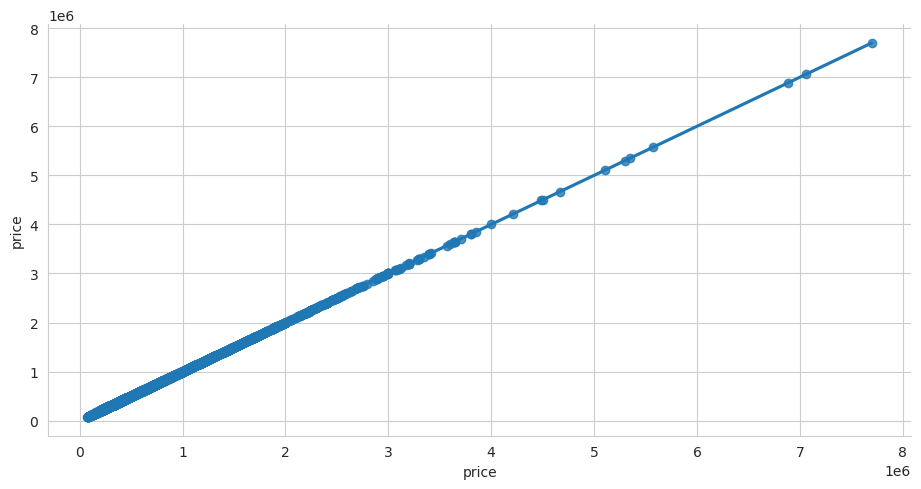

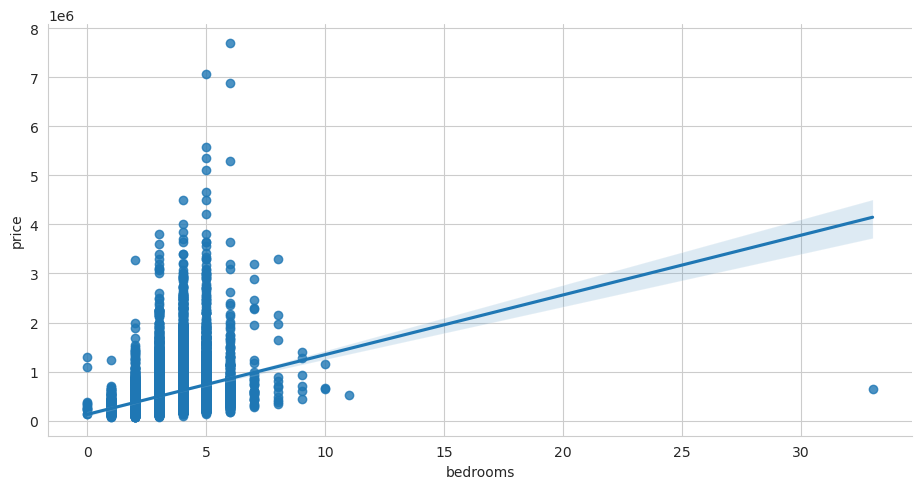

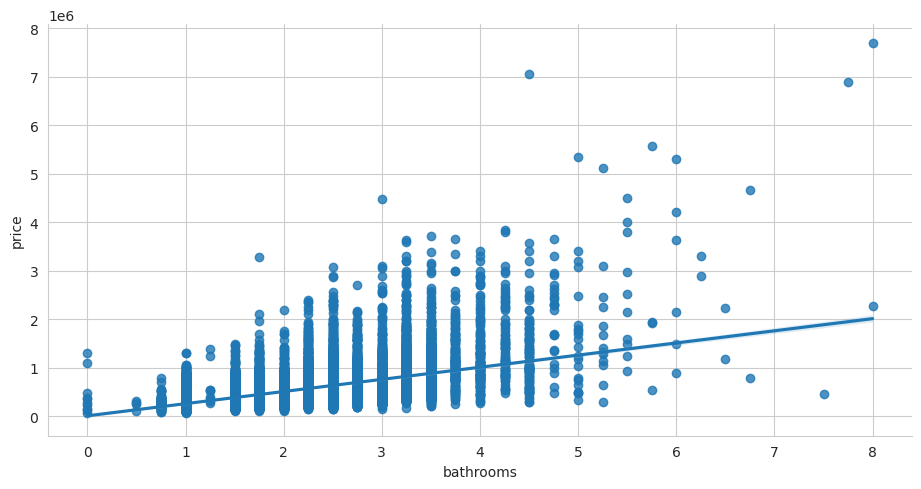

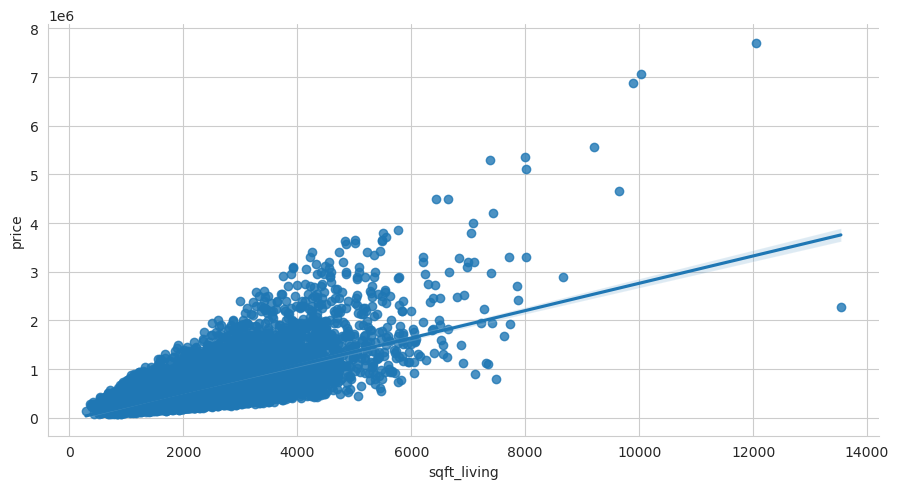

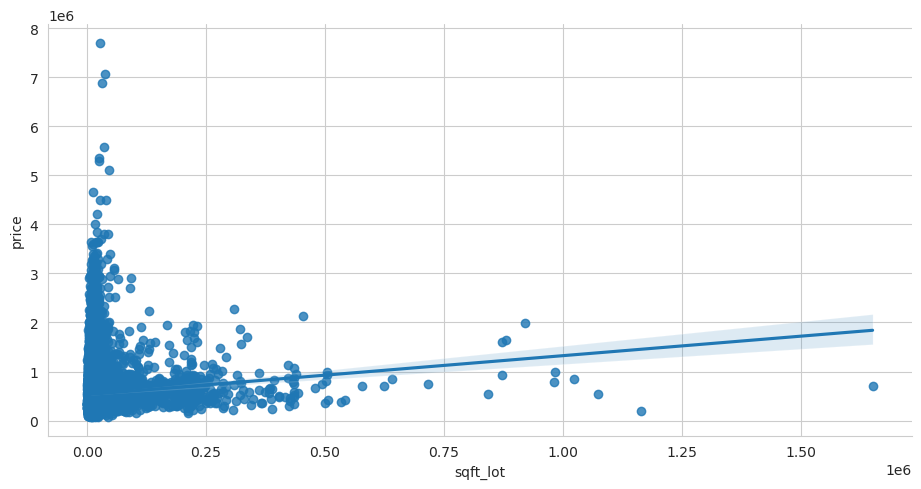

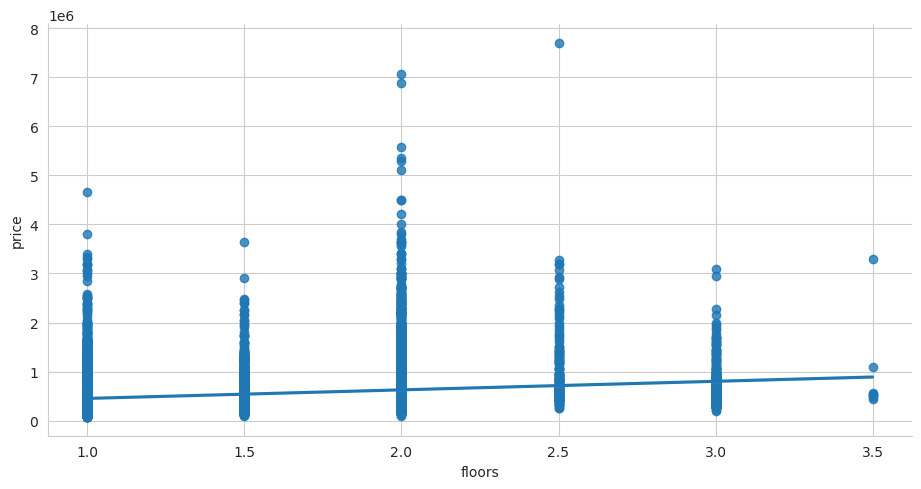

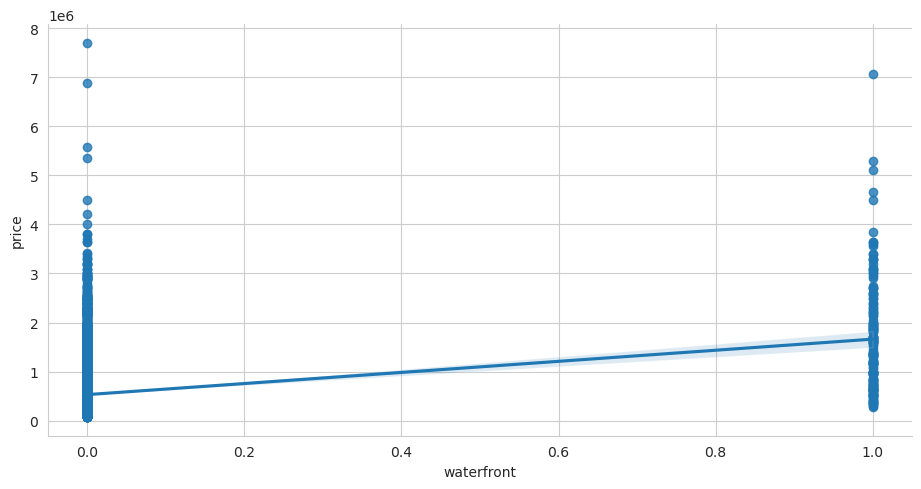

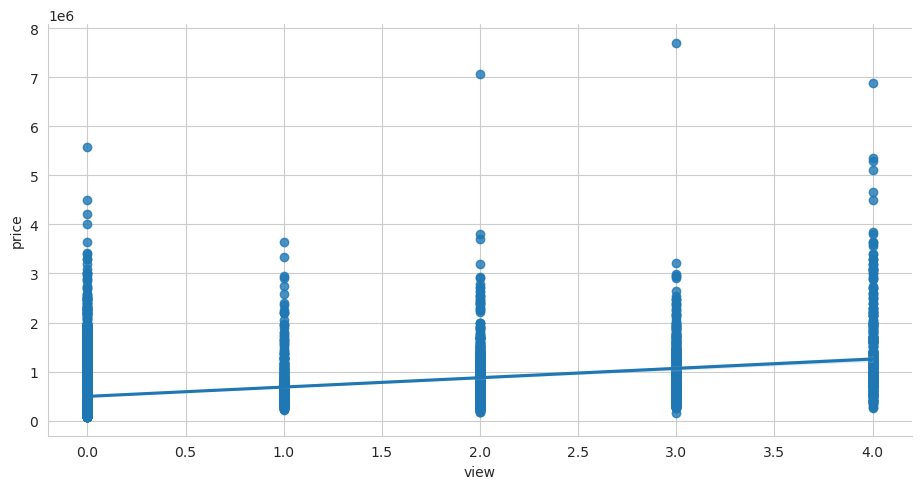

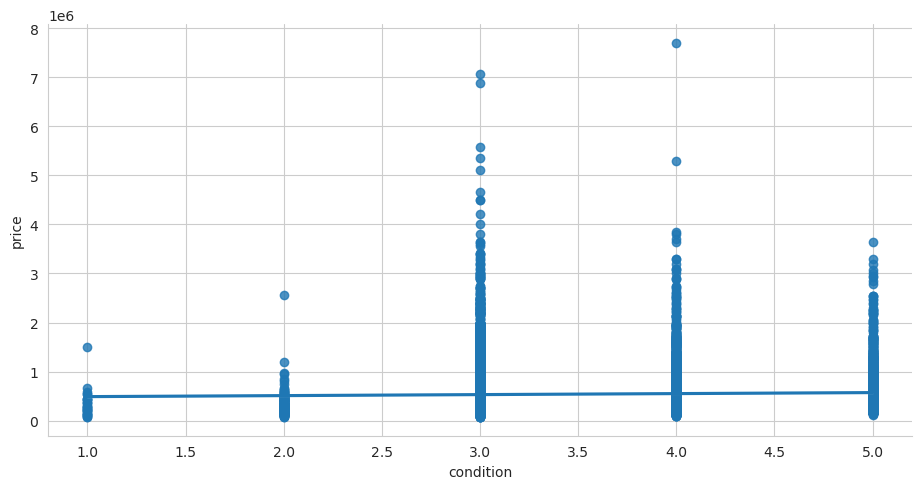

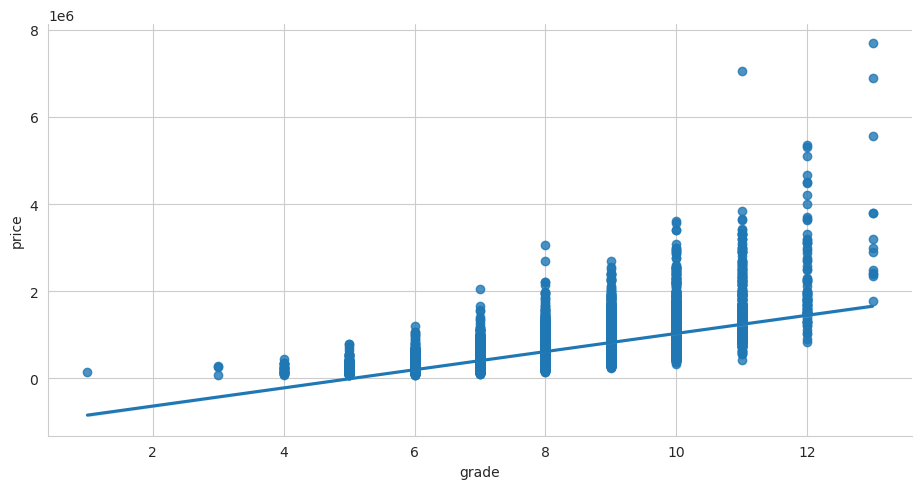

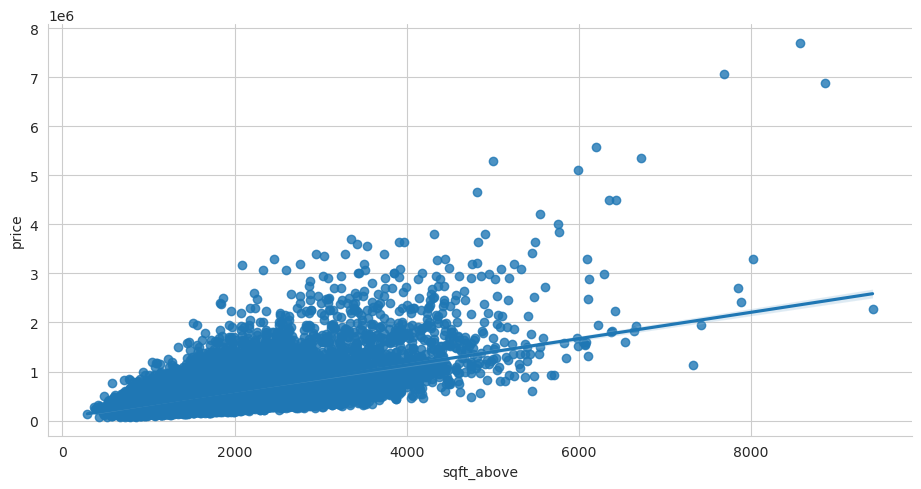

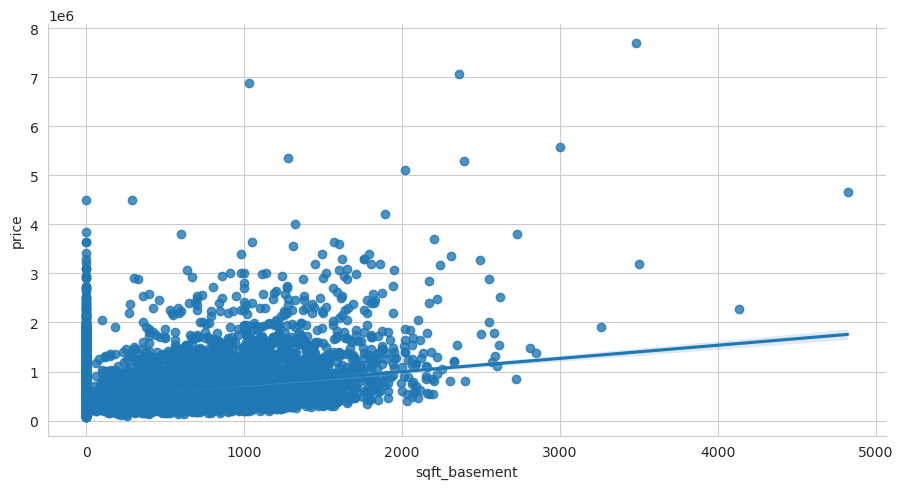

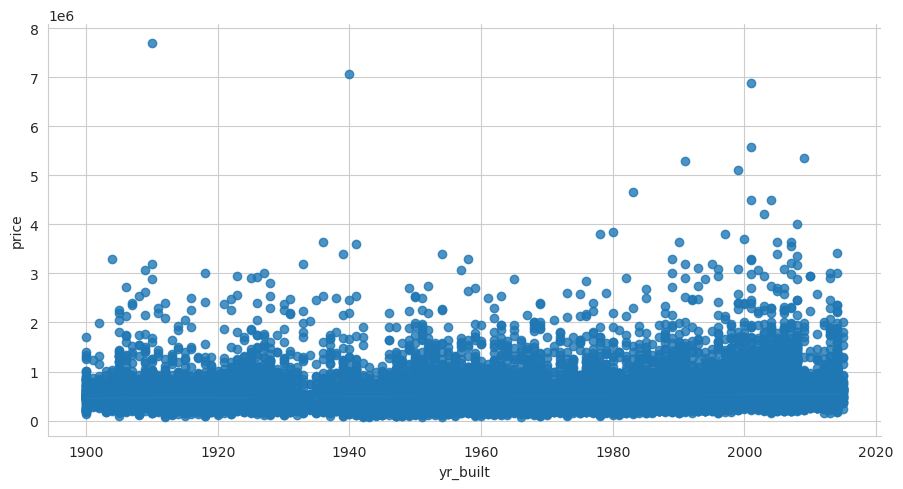

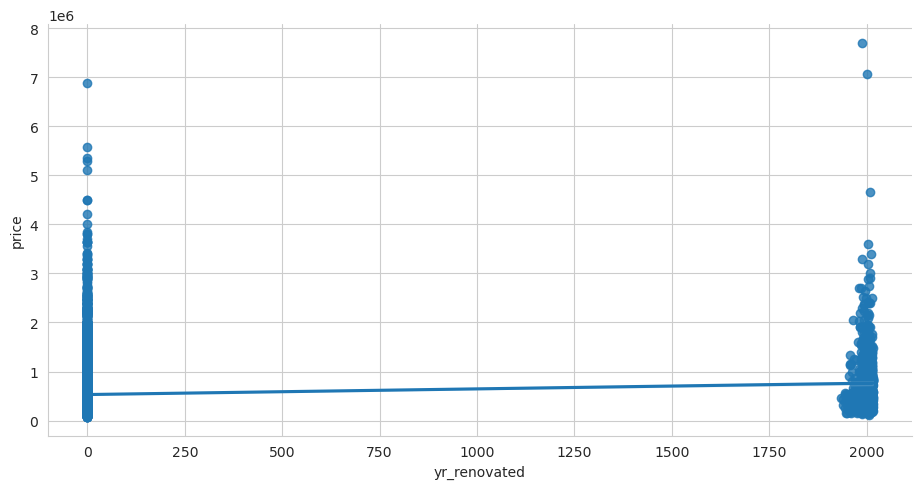

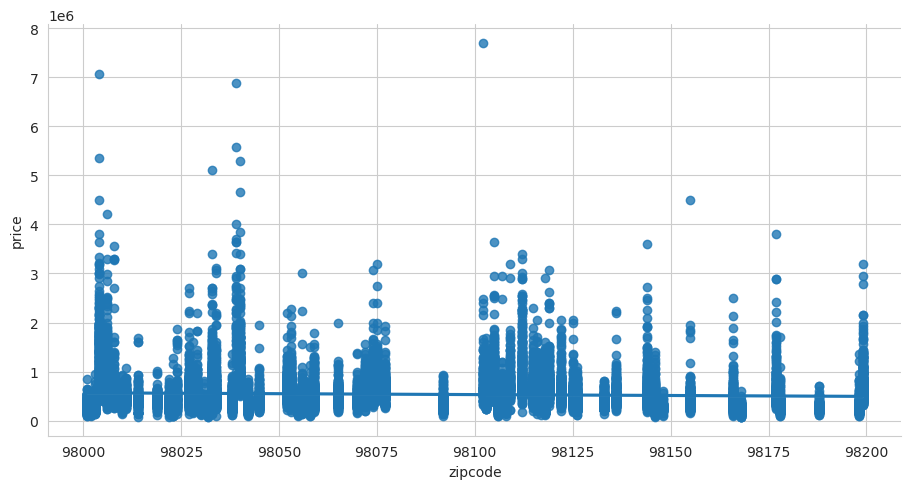

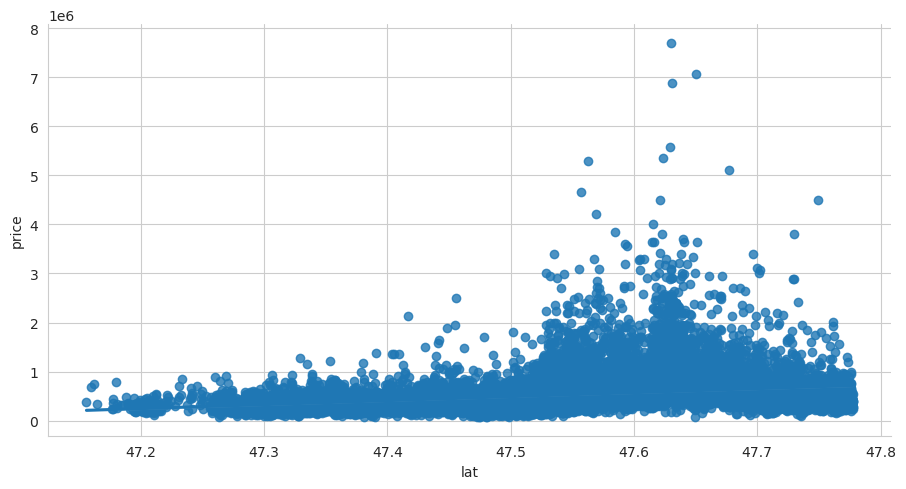

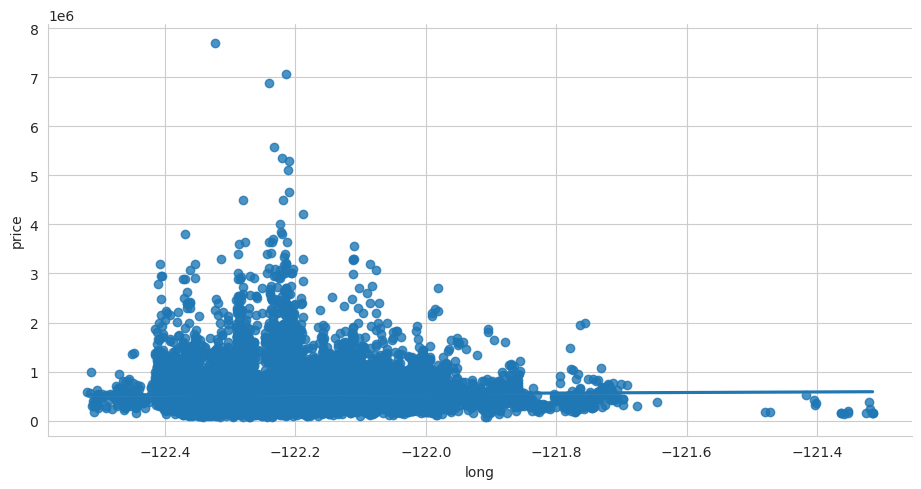

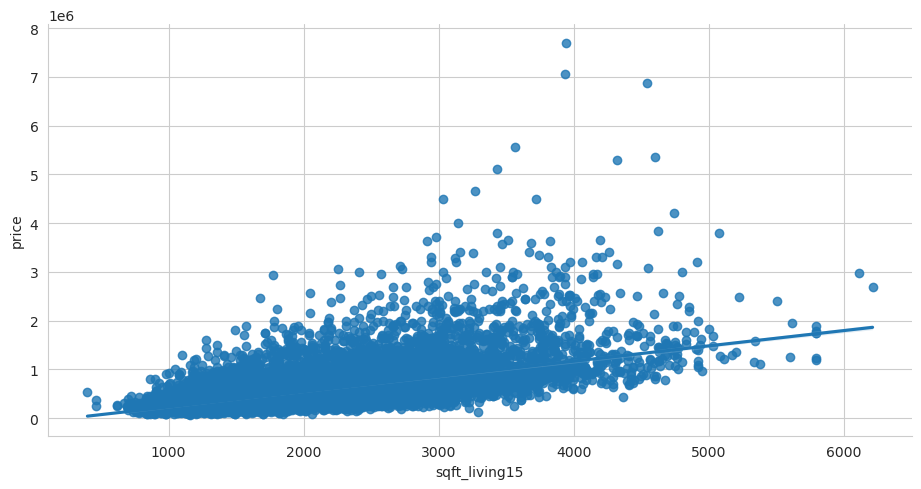

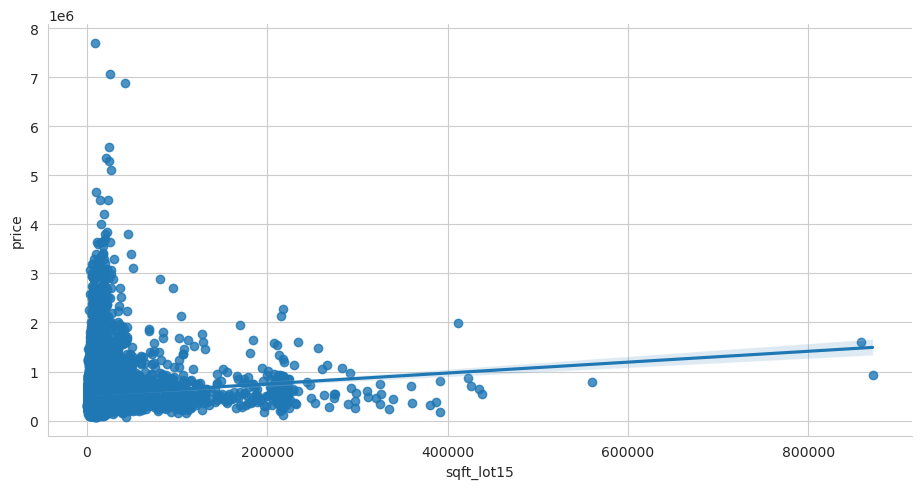

In [71]:
for column in columns:
    hrel(column)

In [129]:
x, y = df.drop(['price', 'id', 'date'], axis=1), df['price'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6891078234574433

In [91]:
scores = []
for column in columns:
    x, y = df[[column]], df['price'] 
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.25)
    model = LinearRegression()
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

In [99]:
score_data = pd.DataFrame({'Feature' : columns[1:], 'Accuracy' : scores[1:]})

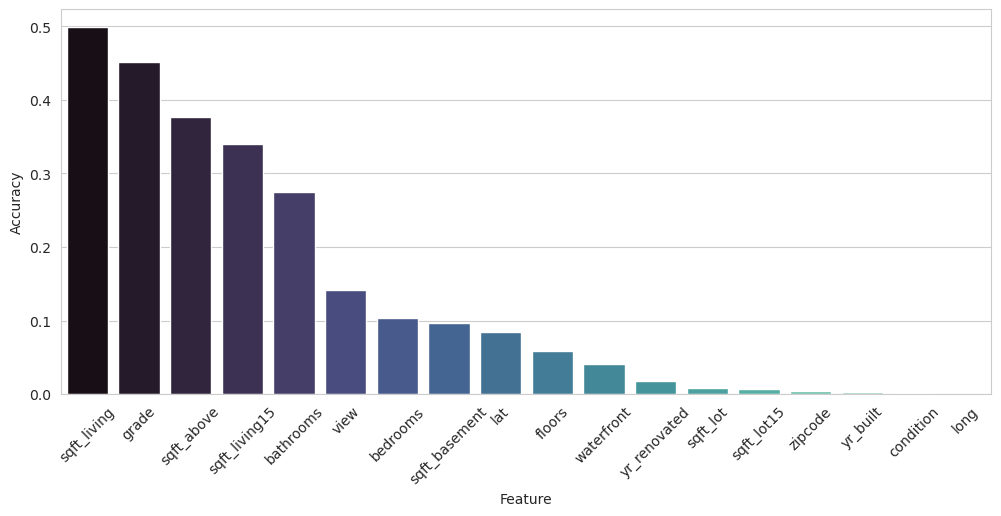

In [108]:
ax = sns.barplot(x = 'Feature', y = 'Accuracy',
                 data = score_data.sort_values(by='Accuracy', ascending=False),
                 palette='mako')
ax.figure.set_size_inches(12, 5)

plt.xticks(rotation = 45)

plt.show()

In [109]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016742,0.001243,0.005237,-0.012166,-0.132110,0.018484,-0.002722,0.011590,-0.023846,0.008165,-0.010830,-0.004983,0.021442,-0.016910,-0.008303,-0.001905,0.020856,-0.002866,-0.138798
price,-0.016742,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.001243,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.005237,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,-0.012166,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,-0.132110,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.018484,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,-0.002722,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.011590,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,-0.023846,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397


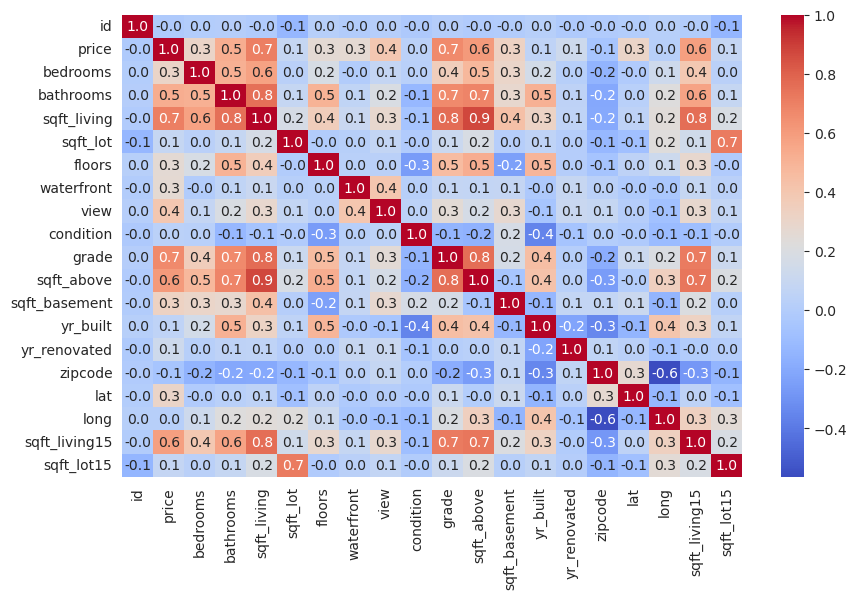

In [118]:
ax = sns.heatmap(df.corr(), cmap='coolwarm', fmt='.1f', annot=True)
ax.figure.set_size_inches(10, 6)

In [149]:
x, y = df.drop(['price', 'id', 'date'], axis=1), df['price'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6891078234574433

In [150]:
from sklearn.feature_selection import RFE

In [151]:
rfe = RFE(model, step=1).fit(x, y)

In [161]:
rfe.get_feature_names_out()

array(['sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long'], dtype=object)

In [166]:
x, y = df[['sqft_living', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long']], df['price'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6563084951545659